AMV Historical Data

In [48]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [49]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [50]:
df

0       15225.0
1       14865.0
2       14414.0
3       14594.0
4       14144.0
         ...   
1308     3500.0
1309     3500.0
1310     3500.0
1311     3600.0
1312     3700.0
Name: Price, Length: 1313, dtype: float64

In [51]:
# 3. Split train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [52]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [54]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [55]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [56]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [57]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[7255.40218577 7247.74189879 7240.08161181 7232.42132482 7224.76103784
 7217.10075086 7209.44046388 7201.78017689 7194.11988991 7186.45960293
 7178.79931595 7171.13902896 7163.47874198 7155.818455   7148.15816802
 7140.49788104 7132.83759405 7125.17730707 7117.51702009 7109.85673311
 7102.19644612 7094.53615914 7086.87587216 7079.21558518 7071.55529819
 7063.89501121 7056.23472423 7048.57443725 7040.91415026 7033.25386328]
Predicted closing prices for the next 60 days:
[7255.40218577 7247.74189879 7240.08161181 7232.42132482 7224.76103784
 7217.10075086 7209.44046388 7201.78017689 7194.11988991 7186.45960293
 7178.79931595 7171.13902896 7163.47874198 7155.818455   7148.15816802
 7140.49788104 7132.83759405 7125.17730707 7117.51702009 7109.85673311
 7102.19644612 7094.53615914 7086.87587216 7079.21558518 7071.55529819
 7063.89501121 7056.23472423 7048.57443725 7040.91415026 7033.25386328
 7025.5935763  7017.93328932 7010.27300233 7002.61271

In [58]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 4816.310054828628
MAPE: 120.01972959819524
MSLE: 0.6261791064600772


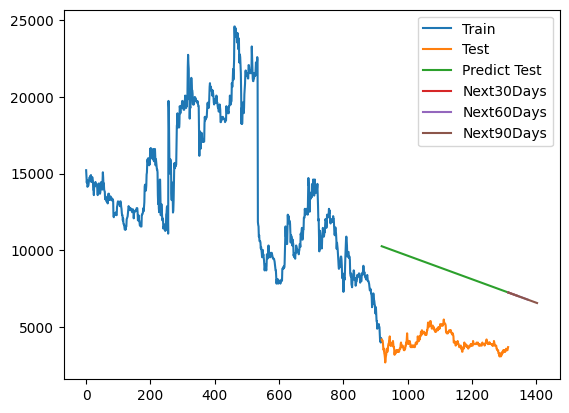

In [59]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DHT Historical Data

In [60]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [61]:
# 2. Load data
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [62]:
df

0       10860.1
1       11224.9
2       11337.1
3       11561.6
4       11589.7
         ...   
1307    38600.0
1308    39300.0
1309    39500.0
1310    39300.0
1311    40400.0
Name: Price, Length: 1312, dtype: float64

In [63]:
# 3. Split train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [64]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [65]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [66]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [67]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [68]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [69]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[17019.59778871 17021.60858747 17023.61938623 17025.63018499
 17027.64098376 17029.65178252 17031.66258128 17033.67338004
 17035.6841788  17037.69497756 17039.70577633 17041.71657509
 17043.72737385 17045.73817261 17047.74897137 17049.75977013
 17051.77056889 17053.78136766 17055.79216642 17057.80296518
 17059.81376394 17061.8245627  17063.83536146 17065.84616023
 17067.85695899 17069.86775775 17071.87855651 17073.88935527
 17075.90015403 17077.91095279]
Predicted closing prices for the next 60 days:
[17019.59778871 17021.60858747 17023.61938623 17025.63018499
 17027.64098376 17029.65178252 17031.66258128 17033.67338004
 17035.6841788  17037.69497756 17039.70577633 17041.71657509
 17043.72737385 17045.73817261 17047.74897137 17049.75977013
 17051.77056889 17053.78136766 17055.79216642 17057.80296518
 17059.81376394 17061.8245627  17063.83536146 17065.84616023
 17067.85695899 17069.86775775 17071.87855651 17073.88935527
 17075.90015403 1707

In [70]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 7474.997902235852
MAPE: 25.484304129611296
MSLE: 0.11900040259354065


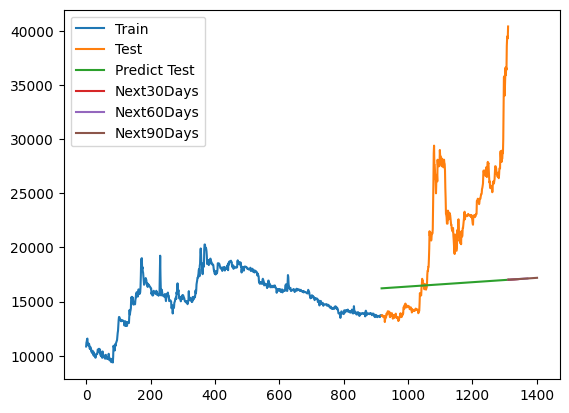

In [71]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DP3 Historical Data

In [72]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [73]:
# 2. Load data
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [74]:
df

0       73800.0
1       74900.0
2       74400.0
3       74700.0
4       76300.0
         ...   
1132    60900.0
1133    61000.0
1134    61000.0
1135    61500.0
1136    61600.0
Name: Price, Length: 1137, dtype: float64

In [75]:
# 3. Split train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [76]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [78]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [79]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [80]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [81]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[94262.97700038 94280.30520659 94297.63341281 94314.96161902
 94332.28982523 94349.61803145 94366.94623766 94384.27444387
 94401.60265009 94418.9308563  94436.25906251 94453.58726873
 94470.91547494 94488.24368115 94505.57188737 94522.90009358
 94540.22829979 94557.55650601 94574.88471222 94592.21291843
 94609.54112465 94626.86933086 94644.19753707 94661.52574329
 94678.8539495  94696.18215571 94713.51036193 94730.83856814
 94748.16677435 94765.49498057]
Predicted closing prices for the next 60 days:
[94262.97700038 94280.30520659 94297.63341281 94314.96161902
 94332.28982523 94349.61803145 94366.94623766 94384.27444387
 94401.60265009 94418.9308563  94436.25906251 94453.58726873
 94470.91547494 94488.24368115 94505.57188737 94522.90009358
 94540.22829979 94557.55650601 94574.88471222 94592.21291843
 94609.54112465 94626.86933086 94644.19753707 94661.52574329
 94678.8539495  94696.18215571 94713.51036193 94730.83856814
 94748.16677435 9476

In [82]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 37603.01690940788
MAPE: 75.97506128966138
MSLE: 0.34774588636399395


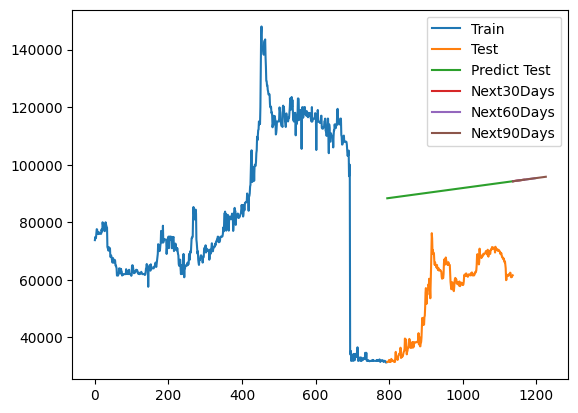

In [83]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()